# EDA Muesli Company

### Business case
A Muesli distribution company has approached you to help them understand their delivery process. They want to develop KPIs to help them keep track of the health of their business in order to improve the service they offer their customers.

### Workflow
maybe add more whitespace on the edges and a internal/external heading on the side
![workflow](images/Muesli_Flow.drawio.png)
![workflow](./images/workflow.png)

In [482]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [483]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

## Orders-Dataset

In [484]:
# read in csv file and display first 5 rows of #!CAMPAIGN DATA
df_orders = pd.read_csv("data/Group_1_MuesliProjectrawdata-Orders.csv", header=1)
df_orders.rename(columns=lambda x : x.lower(), inplace=True)
df_orders.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_orders.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


In [485]:
# check which columns are included in our dataframe
df_orders.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [486]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_orders.shape

(9994, 19)

In [487]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   order_date      9994 non-null   object 
 3   ship_mode       9994 non-null   object 
 4   customer_id     9994 non-null   object 
 5   customer_name   9994 non-null   object 
 6   origin_channel  9994 non-null   object 
 7   country/region  9994 non-null   object 
 8   city            9994 non-null   object 
 9   state           9994 non-null   object 
 10  postal_code     9983 non-null   float64
 11  region          9994 non-null   object 
 12  category        9994 non-null   object 
 13  sub-category    9994 non-null   object 
 14  product_id      9994 non-null   object 
 15  sales           9994 non-null   float64
 16  quantity        9994 non-null   int64  
 17  discount        9994 non-null   f

In [488]:
# drop columns we don't need
df_orders.drop(["index","customer_name", "origin_channel", "country/region", "city", "state", "postal_code", "region", "category", "sub-category", "product_id", "sales", "quantity", "discount", "profit"], axis=1, inplace=True)
df_orders.head()

,order_id,order_date,ship_mode,customer_id
0,CA-2019-121755,16/1/2019,Second Class,EH-13945
1,CA-2019-118255,11/3/2019,First Class,ON-18715
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900
3,CA-2019-111682,17/6/2019,First Class,TB-21055
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720


In [489]:
# check for duplicate rows in video_id column
df_orders["order_id"].duplicated().value_counts()
# There are many duplicates because orders contain multiple items
# Since we are only looking at logistic aspects, we are going to drop the duplicates
df_orders.drop_duplicates(inplace=True)


## Campaign-Dataset

In [490]:
# read in csv file and display first 5 rows of #!CAMPAIGN DATA
df_camp = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Campaign_Data.csv")
df_camp.rename(columns=lambda x : x.lower(), inplace=True)
df_camp.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_camp.drop(["customer_name"], axis = 1, inplace=True)
df_camp.head()

,order_id,arrival_scan_date
0,CA-2019-109666,03/05/2019
1,CA-2019-138933,03/05/2019
2,CA-2019-130001,03/05/2019
3,CA-2019-113061,06/05/2019
4,CA-2019-162138,06/05/2019


In [491]:
# check which columns are included in our dataframe
df_camp.columns

Index(['order_id', 'arrival_scan_date'], dtype='object')

In [492]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_camp.shape

(333, 2)

In [493]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           333 non-null    object
 1   arrival_scan_date  333 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


In [494]:
# check for duplicate rows in video_id column
df_camp["order_id"].duplicated().value_counts()
# No duplicates

False    333
Name: order_id, dtype: int64

## Process-Dataset

In [495]:
# read in csv file and display first 5 rows of #!PROCESS
df_process = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Order_Process_Data.csv")
df_process.rename(columns=lambda x : x.lower(), inplace=True)
df_process.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_process.drop(["row_id"], axis = 1, inplace=True)

df_process.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,3/1/2019,07/01/2019,Express
1,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


In [496]:
# check which columns are included in our dataframe
df_process.columns

Index(['order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

In [497]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_process.shape

(5899, 4)

In [498]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            5899 non-null   object
 1   order_date          5899 non-null   object
 2   on_truck_scan_date  5899 non-null   object
 3   ship_mode           5899 non-null   object
dtypes: object(4)
memory usage: 184.5+ KB


In [499]:
# check for duplicate rows in video_id column
df_process["order_id"].duplicated().value_counts()
# There are many duplicates because orders contain multiple items
# Since we are only looking at logistic aspects, we are going to drop the duplicates
# Assumption: All products of one order are being processed and shipped together
#TODO proof if assumption is correct
df_process.drop_duplicates(inplace=True)
df_process["order_id"].duplicated().value_counts()
#TODO Why are there still two duplicates and how do we check them?


False    3002
True        1
Name: order_id, dtype: int64

## Intern Data Study

In [500]:
# read in csv file and display first 5 rows of #!INTERN DATA STUDY
df_intern = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Intern_Data_Study.csv")
df_intern.rename(columns=lambda x : x.lower(), inplace=True)
df_intern.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_intern.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019


In [501]:
# check which columns are included in our dataframe
df_intern.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [502]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_intern.shape

(290, 3)

In [503]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            290 non-null    object
 1   ready_to_ship_date  290 non-null    object
 2   pickup_date         290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [504]:
# check for duplicate rows in video_id column
df_intern["order_id"].duplicated().value_counts()
# Customer scanned multiple times -> drop duplicates
df_intern.drop_duplicates(inplace=True)

In [505]:
# Merge datasets
#TODO merge, outliers, dates (to have weekdays), define KPIs

In [506]:
# Merge Order with Campaign
order_camp_dataset = pd.merge(df_orders, df_camp, on="order_id", how="outer")
display(order_camp_dataset.info())
display(order_camp_dataset.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           5009 non-null   object
 1   order_date         5009 non-null   object
 2   ship_mode          5009 non-null   object
 3   customer_id        5009 non-null   object
 4   arrival_scan_date  333 non-null    object
dtypes: object(5)
memory usage: 234.8+ KB


None

,order_id,order_date,ship_mode,customer_id,arrival_scan_date
0,CA-2019-121755,16/1/2019,Second Class,EH-13945,NaN
1,CA-2019-118255,11/3/2019,First Class,ON-18715,NaN
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900,NaN
3,CA-2019-111682,17/6/2019,First Class,TB-21055,NaN
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720,NaN


In [507]:
# Merge Process with Intern
process_intern_dataset = pd.merge(df_intern, df_process, on="order_id", how="outer")
display(process_intern_dataset.info())
display(process_intern_dataset.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 3002
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            3003 non-null   object
 1   ready_to_ship_date  204 non-null    object
 2   pickup_date         204 non-null    object
 3   order_date          3003 non-null   object
 4   on_truck_scan_date  3003 non-null   object
 5   ship_mode           3003 non-null   object
dtypes: object(6)
memory usage: 164.2+ KB


None

,order_id,ready_to_ship_date,pickup_date,order_date,on_truck_scan_date,ship_mode
0,CA-2019-116540,02/09/2019,03/09/2019,2/9/2019,03/09/2019,Express
1,CA-2019-129847,04/09/2019,04/09/2019,2/9/2019,04/09/2019,Express
2,CA-2019-129630,04/09/2019,04/09/2019,4/9/2019,04/09/2019,Express
3,CA-2019-106278,05/09/2019,06/09/2019,2/9/2019,06/09/2019,Standard Processing
4,CA-2019-158099,05/09/2019,06/09/2019,3/9/2019,06/09/2019,Express


In [508]:
final_dataset = pd.merge(order_camp_dataset, process_intern_dataset, on="order_id", how="outer")
display(final_dataset.info())
display(final_dataset.head())
final_dataset[["on_truck_scan_date", "pickup_date"]]
final_dataset["order_id"].duplicated().value_counts()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 5009
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            5010 non-null   object
 1   order_date_x        5010 non-null   object
 2   ship_mode_x         5010 non-null   object
 3   customer_id         5010 non-null   object
 4   arrival_scan_date   333 non-null    object
 5   ready_to_ship_date  204 non-null    object
 6   pickup_date         204 non-null    object
 7   order_date_y        3003 non-null   object
 8   on_truck_scan_date  3003 non-null   object
 9   ship_mode_y         3003 non-null   object
dtypes: object(10)
memory usage: 430.5+ KB


None

,order_id,order_date_x,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date,ship_mode_y
0,CA-2019-121755,16/1/2019,Second Class,EH-13945,NaN,NaN,NaN,16/1/2019,23/01/2019,Standard Processing
1,CA-2019-118255,11/3/2019,First Class,ON-18715,NaN,NaN,NaN,11/3/2019,13/03/2019,Express
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900,NaN,NaN,NaN,20/6/2019,26/06/2019,Standard Processing
3,CA-2019-111682,17/6/2019,First Class,TB-21055,NaN,NaN,NaN,17/6/2019,19/06/2019,Express
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720,NaN,NaN,NaN,NaN,NaN,NaN


False    5009
True        1
Name: order_id, dtype: int64

In [509]:
final_dataset.head()


,order_id,order_date_x,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date,ship_mode_y
0,CA-2019-121755,16/1/2019,Second Class,EH-13945,NaN,NaN,NaN,16/1/2019,23/01/2019,Standard Processing
1,CA-2019-118255,11/3/2019,First Class,ON-18715,NaN,NaN,NaN,11/3/2019,13/03/2019,Express
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900,NaN,NaN,NaN,20/6/2019,26/06/2019,Standard Processing
3,CA-2019-111682,17/6/2019,First Class,TB-21055,NaN,NaN,NaN,17/6/2019,19/06/2019,Express
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720,NaN,NaN,NaN,NaN,NaN,NaN


In [510]:
#Checking if First Class = Express
display(final_dataset.groupby(['ship_mode_x', 'ship_mode_y']).count())
display(final_dataset.info())
#more non-null in ship_mode_x -> therefore drop ship_mode_y later -> left it in for now for traceability



,,order_id,order_date_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date
ship_mode_x,ship_mode_y,,,,,,,,
First Class,Express,663,663,663,75,53,53,663,663
Second Class,Standard Processing,568,568,568,58,44,44,568,568
Standard Class,Standard Processing,1772,1772,1772,200,107,107,1772,1772


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 5009
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            5010 non-null   object
 1   order_date_x        5010 non-null   object
 2   ship_mode_x         5010 non-null   object
 3   customer_id         5010 non-null   object
 4   arrival_scan_date   333 non-null    object
 5   ready_to_ship_date  204 non-null    object
 6   pickup_date         204 non-null    object
 7   order_date_y        3003 non-null   object
 8   on_truck_scan_date  3003 non-null   object
 9   ship_mode_y         3003 non-null   object
dtypes: object(10)
memory usage: 430.5+ KB


None

In [511]:
final_dataset['order_date_x'] = pd.to_datetime(final_dataset['order_date_x'], format='%d/%m/%Y')
final_dataset['order_date_y'] = pd.to_datetime(final_dataset['order_date_y'], format='%d/%m/%Y')
final_dataset['arrival_scan_date'] = pd.to_datetime(final_dataset['arrival_scan_date'], format='%d/%m/%Y')
final_dataset['ready_to_ship_date'] = pd.to_datetime(final_dataset['ready_to_ship_date'], format='%d/%m/%Y')
final_dataset['pickup_date'] = pd.to_datetime(final_dataset['pickup_date'], format='%d/%m/%Y')
final_dataset['on_truck_scan_date'] = pd.to_datetime(final_dataset['on_truck_scan_date'], format='%d/%m/%Y')
final_dataset["order_weekday"]= final_dataset["order_date_x"].dt.dayofweek
final_dataset.info()
final_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 5009
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5010 non-null   object        
 1   order_date_x        5010 non-null   datetime64[ns]
 2   ship_mode_x         5010 non-null   object        
 3   customer_id         5010 non-null   object        
 4   arrival_scan_date   333 non-null    datetime64[ns]
 5   ready_to_ship_date  204 non-null    datetime64[ns]
 6   pickup_date         204 non-null    datetime64[ns]
 7   order_date_y        3003 non-null   datetime64[ns]
 8   on_truck_scan_date  3003 non-null   datetime64[ns]
 9   ship_mode_y         3003 non-null   object        
 10  order_weekday       5010 non-null   int64         
dtypes: datetime64[ns](6), int64(1), object(4)
memory usage: 469.7+ KB


,order_id,order_date_x,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date,ship_mode_y,order_weekday
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,NaT,NaT,NaT,2019-01-16,2019-01-23,Standard Processing,2
1,CA-2019-118255,2019-03-11,First Class,ON-18715,NaT,NaT,NaT,2019-03-11,2019-03-13,Express,0
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,NaT,NaT,NaT,2019-06-20,2019-06-26,Standard Processing,3
3,CA-2019-111682,2019-06-17,First Class,TB-21055,NaT,NaT,NaT,2019-06-17,2019-06-19,Express,0
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,NaT,NaT,NaT,NaT,NaT,NaN,5


In [512]:
#Check if the two order date columns are the same
final_dataset["delta_order_date"] = final_dataset["order_date_x"] - final_dataset["order_date_y"]
final_dataset.delta_order_date.describe()
# Yes, they are -> 0 days time difference for all entries
# drop one order date column and ship_mode_y as ship_mode_x has less non-null cells -> ship_mode_x not deleted yet for traceability
final_dataset.drop(["order_date_y", "delta_order_date"], axis=1, inplace=True)
# rename column
final_dataset.rename(columns={"order_date_x": "order_date"}, inplace=True)

# show dataset
final_dataset.head()


,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_weekday
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,NaT,NaT,NaT,2019-01-23,Standard Processing,2
1,CA-2019-118255,2019-03-11,First Class,ON-18715,NaT,NaT,NaT,2019-03-13,Express,0
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,NaT,NaT,NaT,2019-06-26,Standard Processing,3
3,CA-2019-111682,2019-06-17,First Class,TB-21055,NaT,NaT,NaT,2019-06-19,Express,0
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,NaT,NaT,NaT,NaT,NaN,5


In [513]:
# Calculate actual day in process phases
final_dataset["order_to_arrival"] = (final_dataset["arrival_scan_date"] - final_dataset["order_date"]).dt.days
final_dataset["order_to_ready2ship"] = (final_dataset["ready_to_ship_date"] - final_dataset["order_date"]).dt.days
final_dataset["ready2ship_to_pickup_date"] = (final_dataset["pickup_date"] - final_dataset["ready_to_ship_date"]).dt.days
final_dataset["pickup_date_to_arrival"] = (final_dataset["arrival_scan_date"] - final_dataset["pickup_date"]).dt.days


display(final_dataset.describe())
#final_dataset.head()

,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
count,"5,010.00",333.00,204.00,204.00,22.00
mean,2.63,10.83,4.18,1.57,4.68
std,1.82,2.86,1.97,0.95,0.78
min,0.00,3.00,0.00,0.00,3.00
25%,1.00,9.00,3.00,1.00,5.00
50%,3.00,11.00,4.00,2.00,5.00
75%,4.00,13.00,6.00,2.00,5.00
max,6.00,17.00,8.00,3.00,6.00


In [514]:
final_dataset.query("order_to_arrival > 14").count()
# 26 order of 333 existing entries take
# 

order_id                     26
order_date                   26
ship_mode_x                  26
customer_id                  26
arrival_scan_date            26
ready_to_ship_date            0
pickup_date                   0
on_truck_scan_date           26
ship_mode_y                  26
order_weekday                26
order_to_arrival             26
order_to_ready2ship           0
ready2ship_to_pickup_date     0
pickup_date_to_arrival        0
dtype: int64

<AxesSubplot:>

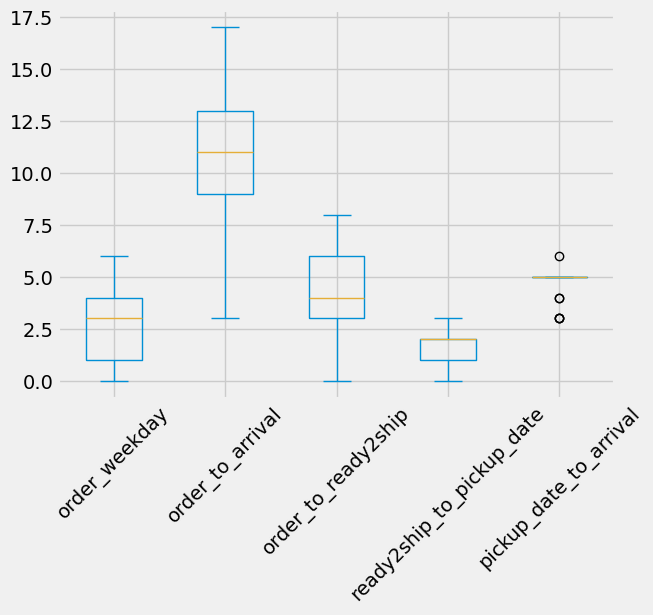

In [515]:
final_dataset.plot(kind="box", rot=45)
#outlier in pickup_date_to_arrival -> boxplot seems a bit weird -> see hist down below


<AxesSubplot:ylabel='Frequency'>

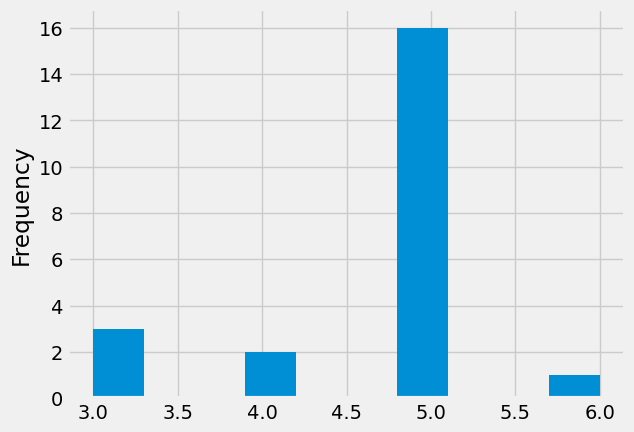

In [516]:
final_dataset.pickup_date_to_arrival.plot(kind='hist')

In [517]:
#make two new dataframes for express / normal processing

final_dataset_express = final_dataset.query("ship_mode_x == 'First Class'")
final_dataset_normal = final_dataset.query("ship_mode_x == 'Standard Class' or ship_mode_x == 'Second Class'")
display(final_dataset_express.head())
final_ds_express.info()
display(final_dataset_normal.head())
final_ds_normal.info()

,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
1,CA-2019-118255,2019-03-11,First Class,ON-18715,NaT,NaT,NaT,2019-03-13,Express,0,NaN,NaN,NaN,NaN
3,CA-2019-111682,2019-06-17,First Class,TB-21055,NaT,NaT,NaT,2019-06-19,Express,0,NaN,NaN,NaN,NaN
20,CA-2018-155334,2018-07-30,First Class,HA-14920,NaT,NaT,NaT,NaT,NaN,0,NaN,NaN,NaN,NaN
25,CA-2019-129714,2019-09-01,First Class,AB-10060,NaT,NaT,NaT,2019-09-04,Express,6,NaN,NaN,NaN,NaN
32,CA-2017-142048,2017-06-22,First Class,JE-15745,NaT,NaT,NaT,NaT,NaN,3,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 1 to 5006
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   1052 non-null   object        
 1   order_date                 1052 non-null   datetime64[ns]
 2   ship_mode_x                1052 non-null   object        
 3   customer_id                1052 non-null   object        
 4   arrival_scan_date          75 non-null     datetime64[ns]
 5   ready_to_ship_date         53 non-null     datetime64[ns]
 6   pickup_date                53 non-null     datetime64[ns]
 7   on_truck_scan_date         663 non-null    datetime64[ns]
 8   ship_mode_y                663 non-null    object        
 9   order_to_arrival           75 non-null     float64       
 10  order_to_ready2ship        53 non-null     float64       
 11  ready2ship_to_pickup_date  53 non-null     float64       
 12  pickup

,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,NaT,NaT,NaT,2019-01-23,Standard Processing,2,NaN,NaN,NaN,NaN
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,NaT,NaT,NaT,2019-06-26,Standard Processing,3,NaN,NaN,NaN,NaN
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,NaT,NaT,NaT,NaT,NaN,5,NaN,NaN,NaN,NaN
5,CA-2020-155558,2020-10-26,Standard Class,PG-18895,NaT,NaT,NaT,2020-11-04,Standard Processing,0,NaN,NaN,NaN,NaN
6,CA-2019-158568,2019-08-29,Standard Class,RB-19465,NaT,NaT,NaT,2019-09-04,Standard Processing,3,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 5009
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   3958 non-null   object        
 1   order_date                 3958 non-null   datetime64[ns]
 2   ship_mode_x                3958 non-null   object        
 3   customer_id                3958 non-null   object        
 4   arrival_scan_date          258 non-null    datetime64[ns]
 5   ready_to_ship_date         151 non-null    datetime64[ns]
 6   pickup_date                151 non-null    datetime64[ns]
 7   on_truck_scan_date         2340 non-null   datetime64[ns]
 8   ship_mode_y                2340 non-null   object        
 9   order_to_arrival           258 non-null    float64       
 10  order_to_ready2ship        151 non-null    float64       
 11  ready2ship_to_pickup_date  151 non-null    float64       
 12  pickup

In [530]:
#double check express/normal dataframe
display(final_dataset_normal.groupby(['ship_mode_x', 'ship_mode_y']).count())
display(final_dataset_express.groupby(['ship_mode_x', 'ship_mode_y']).count())


,,order_id,order_date,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
ship_mode_x,ship_mode_y,,,,,,,,,,,,
Second Class,Standard Processing,568,568,568,58,44,44,568,568,58,44,44,7
Standard Class,Standard Processing,1772,1772,1772,200,107,107,1772,1772,200,107,107,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 5009
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   5010 non-null   object        
 1   order_date                 5010 non-null   datetime64[ns]
 2   ship_mode_x                5010 non-null   object        
 3   customer_id                5010 non-null   object        
 4   arrival_scan_date          333 non-null    datetime64[ns]
 5   ready_to_ship_date         204 non-null    datetime64[ns]
 6   pickup_date                204 non-null    datetime64[ns]
 7   on_truck_scan_date         3003 non-null   datetime64[ns]
 8   ship_mode_y                3003 non-null   object        
 9   order_weekday              5010 non-null   int64         
 10  order_to_arrival           333 non-null    float64       
 11  order_to_ready2ship        204 non-null    float64       
 12  ready2

None

In [518]:

display("final dataset", final_dataset.describe())
display("normal", final_dataset_normal.describe())
display("express", final_dataset_express.describe())



'final dataset'

,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
count,"5,010.00",333.00,204.00,204.00,22.00
mean,2.63,10.83,4.18,1.57,4.68
std,1.82,2.86,1.97,0.95,0.78
min,0.00,3.00,0.00,0.00,3.00
25%,1.00,9.00,3.00,1.00,5.00
50%,3.00,11.00,4.00,2.00,5.00
75%,4.00,13.00,6.00,2.00,5.00
max,6.00,17.00,8.00,3.00,6.00


'normal'

,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
count,"3,958.00",258.00,151.00,151.00,18.00
mean,2.64,11.93,4.93,1.99,4.56
std,1.82,1.96,1.44,0.68,0.78
min,0.00,6.00,2.00,1.00,3.00
25%,1.00,11.00,4.00,2.00,4.25
50%,3.00,12.00,5.00,2.00,5.00
75%,4.00,13.00,6.00,2.00,5.00
max,6.00,17.00,8.00,3.00,5.00


'express'

,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
count,"1,052.00",75.00,53.00,53.00,4.00
mean,2.60,7.05,2.04,0.40,5.25
std,1.83,2.16,1.69,0.53,0.50
min,0.00,3.00,0.00,0.00,5.00
25%,1.00,5.00,0.00,0.00,5.00
50%,3.00,7.00,2.00,0.00,5.00
75%,4.00,8.00,3.00,1.00,5.25
max,6.00,13.00,5.00,2.00,6.00


<AxesSubplot:>

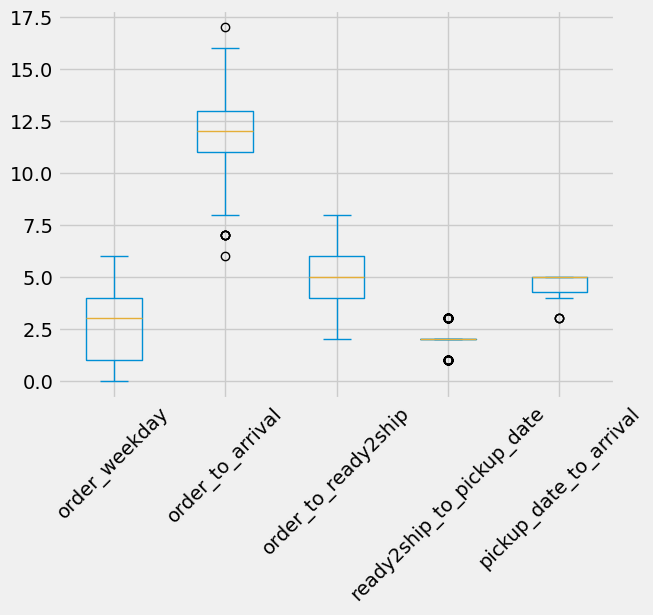

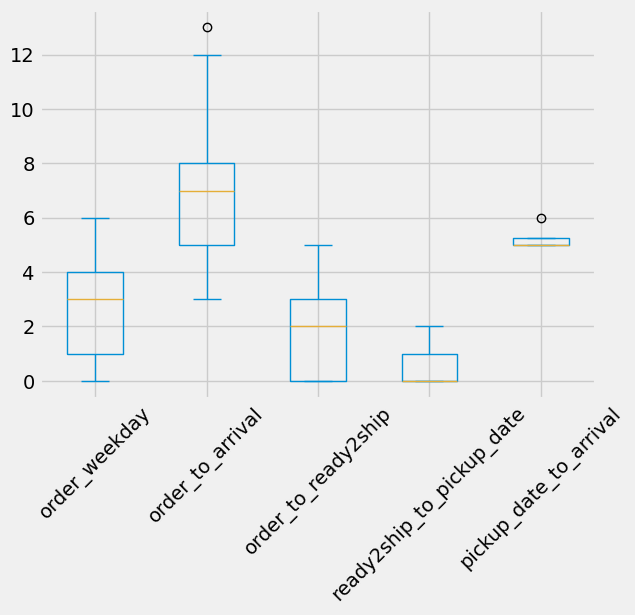

In [519]:
final_dataset_normal.plot(kind="box", rot=45) #more outliers than in final_dataset
final_dataset_express.plot(kind="box", rot=45)

<AxesSubplot:ylabel='Frequency'>

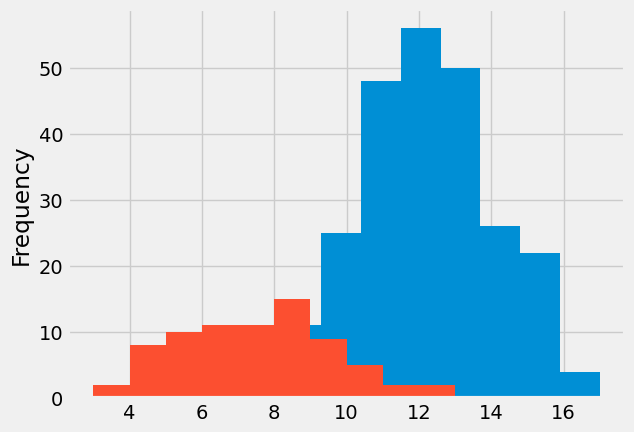

In [520]:
final_dataset_normal.order_to_arrival.plot(kind="hist") #blue
final_dataset_express.order_to_arrival.plot(kind="hist") #red

In [522]:
#what weekday is being ordered?
display(final_dataset_normal.groupby('order_weekday').count())

,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
order_weekday,,,,,,,,,,,,,
0,569,569,569,569,37,25,25,401,401,37,25,25,1
1,698,698,698,698,45,35,35,406,406,45,35,35,3
2,676,676,676,676,41,26,26,409,409,41,26,26,5
3,684,684,684,684,51,21,21,418,418,51,21,21,2
4,640,640,640,640,31,32,32,336,336,31,32,32,7
5,366,366,366,366,4,9,9,138,138,4,9,9,0
6,325,325,325,325,49,3,3,232,232,49,3,3,0


In [531]:
#make new dataframes for each ordering day

final_dataset_monday = final_dataset.query("order_weekday == 0")
final_dataset_tuesday = final_dataset.query("order_weekday == 1")
final_dataset_wednesday = final_dataset.query("order_weekday == 2")
final_dataset_thursday = final_dataset.query("order_weekday == 3")
final_dataset_friday = final_dataset.query("order_weekday == 4")
final_dataset_saturday = final_dataset.query("order_weekday == 5")
final_dataset_sunday = final_dataset.query("order_weekday == 6")

display(final_dataset_monday.head())



,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
1,CA-2019-118255,2019-03-11,First Class,ON-18715,NaT,NaT,NaT,2019-03-13,Express,0,NaN,NaN,NaN,NaN
3,CA-2019-111682,2019-06-17,First Class,TB-21055,NaT,NaT,NaT,2019-06-19,Express,0,NaN,NaN,NaN,NaN
5,CA-2020-155558,2020-10-26,Standard Class,PG-18895,NaT,NaT,NaT,2020-11-04,Standard Processing,0,NaN,NaN,NaN,NaN
8,CA-2020-119004,2020-11-23,Standard Class,JM-15250,NaT,2020-11-30,2020-12-02,2020-12-02,Standard Processing,0,NaN,7.00,2.00,NaN
9,CA-2018-129476,2018-10-15,Standard Class,PA-19060,NaT,NaT,NaT,NaT,NaN,0,NaN,NaN,NaN,NaN


In [536]:
#make new dataframes for each ordering day - NORMAL

final_dataset_normal_monday = final_dataset_normal.query("order_weekday == 0")
final_dataset_normal_tuesday = final_dataset_normal.query("order_weekday == 1")
final_dataset_normal_wednesday = final_dataset_normal.query("order_weekday == 2")
final_dataset_normal_thursday = final_dataset_normal.query("order_weekday == 3")
final_dataset_normal_friday = final_dataset_normal.query("order_weekday == 4")
final_dataset_normal_saturday = final_dataset_normal.query("order_weekday == 5")
final_dataset_normal_sunday = final_dataset_normal.query("order_weekday == 6")

display(final_dataset_normal_monday.head())
display(final_dataset_normal.groupby(['ship_mode_x', 'ship_mode_y']).count())



,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
5,CA-2020-155558,2020-10-26,Standard Class,PG-18895,NaT,NaT,NaT,2020-11-04,Standard Processing,0,NaN,NaN,NaN,NaN
8,CA-2020-119004,2020-11-23,Standard Class,JM-15250,NaT,2020-11-30,2020-12-02,2020-12-02,Standard Processing,0,NaN,7.00,2.00,NaN
9,CA-2018-129476,2018-10-15,Standard Class,PA-19060,NaT,NaT,NaT,NaT,NaN,0,NaN,NaN,NaN,NaN
33,US-2019-123750,2019-04-15,Standard Class,RB-19795,NaT,NaT,NaT,2019-04-24,Standard Processing,0,NaN,NaN,NaN,NaN
46,CA-2017-135405,2017-01-09,Standard Class,MS-17830,NaT,NaT,NaT,NaT,NaN,0,NaN,NaN,NaN,NaN


,,order_id,order_date,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
ship_mode_x,ship_mode_y,,,,,,,,,,,,
Second Class,Standard Processing,568,568,568,58,44,44,568,568,58,44,44,7
Standard Class,Standard Processing,1772,1772,1772,200,107,107,1772,1772,200,107,107,11


In [534]:
#make new dataframes for each ordering day - EXPRESS

final_dataset_express_monday = final_dataset_express.query("order_weekday == 0")
final_dataset_express_tuesday = final_dataset_express.query("order_weekday == 1")
final_dataset_express_wednesday = final_dataset_express.query("order_weekday == 2")
final_dataset_express_thursday = final_dataset_express.query("order_weekday == 3")
final_dataset_express_friday = final_dataset_express.query("order_weekday == 4")
final_dataset_express_saturday = final_dataset_express.query("order_weekday == 5")
final_dataset_express_sunday = final_dataset_express.query("order_weekday == 6")

display(final_dataset_express_monday.head())
display(final_dataset_express_monday.groupby(['ship_mode_x', 'ship_mode_y']).count())



,order_id,order_date,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
1,CA-2019-118255,2019-03-11,First Class,ON-18715,NaT,NaT,NaT,2019-03-13,Express,0,NaN,NaN,NaN,NaN
3,CA-2019-111682,2019-06-17,First Class,TB-21055,NaT,NaT,NaT,2019-06-19,Express,0,NaN,NaN,NaN,NaN
20,CA-2018-155334,2018-07-30,First Class,HA-14920,NaT,NaT,NaT,NaT,NaN,0,NaN,NaN,NaN,NaN
101,CA-2018-139731,2018-10-15,First Class,JE-15745,NaT,NaT,NaT,NaT,NaN,0,NaN,NaN,NaN,NaN
102,CA-2019-152289,2019-08-26,First Class,LC-16930,NaT,NaT,NaT,2019-08-28,Express,0,NaN,NaN,NaN,NaN


,,order_id,order_date,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,order_weekday,order_to_arrival,order_to_ready2ship,ready2ship_to_pickup_date,pickup_date_to_arrival
ship_mode_x,ship_mode_y,,,,,,,,,,,,
First Class,Express,119,119,119,16,10,10,119,119,16,10,10,2
